In [1]:
!pip install -q slycot control
from control import matlab
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [116 lines of output]
  
  
  --------------------------------------------------------------------------------
  -- Trying 'Ninja (Visual Studio 17 2022 x64 v143)' generator
  --------------------------------
  ---------------------------
  ----------------------
  -----------------
  ------------
  -------
  --
  Not searching for unused variables given on the command line.
  CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
    Compatibility with CMake < 3.5 will be removed from a future version of
    CMake.
  
    Update the VERSION argument <min> value or use a ...<max> suffix to tell
    CMake that the project does not need compatibility with older versions.
  
  
  -- The C compiler identification is MSVC 19.39.33523.0
  -- Detecting C compiler ABI info
  -- Detecting C compiler ABI info - done
  -- Check for working C compiler: C:/Program Files/Microsoft Visual Studio/2022/Community/VC/Tools/MSVC

### 28E24013 大木啓輔

### 制御対象を準備 P_0

制御対象を準備
P_0= 
              1
------------------------------
0.6 s^3 + 1.36 s^2 + 1.2 s + 1

極を確認
以下に制御対象のボード線図を示す


(0.1, 100.0)

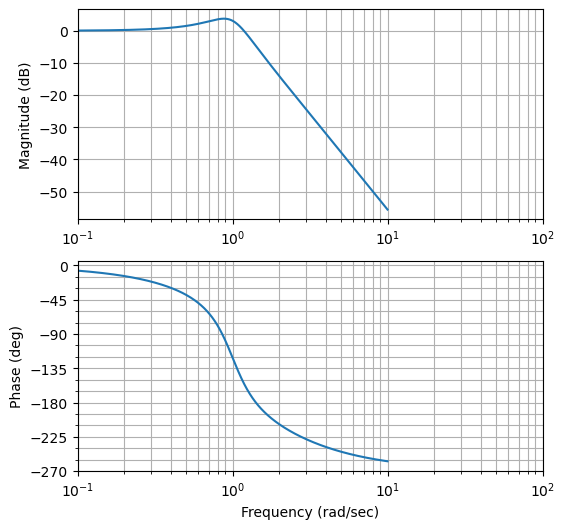

In [2]:
print("制御対象を準備")

# P_0を作る
num1 = [1] #分子の係数
den1 = [1, 0.6, 1] #分母の係数
P_0_1 = matlab.tf(num1,den1) #分数にしてPを作る
num2 = [1] #分子の係数
den2 = [0.6, 1] #分母の係数
P_0_2 = matlab.tf(num2,den2) #分数にしてPを作る

P_0 = matlab.series(P_0_1, P_0_2) #直列にする
print("P_0=", P_0) #Pを出力

print("極を確認")
matlab.pole(P_0) #極を確認

print("以下に制御対象のボード線図を示す")
fig = plt.figure(figsize = (6, 6)) #12×6のfigureを作成
mag, phase, omega = matlab.bode(P_0, Hz=False) #figureにボード線図を描画
plt.xlim(1e-01, 1e+02) # x軸の範囲を1e-01から1e+02に設定

### 制御対象を準備 P

制御対象を準備
Approximation numerator:
[1.0, -33.333333333333336, 500.0, -3888.8888888888887, 12962.962962962964]
Approximation denominator:
[1.0, 33.333333333333336, 500.0, 3888.8888888888887, 12962.962962962964]
Approximated Transfer Function:
P= 
               s^4 - 33.33 s^3 + 500 s^2 - 3889 s + 1.296e+04
-----------------------------------------------------------------------------
s^6 + 33.93 s^5 + 521 s^4 + 4222 s^3 + 1.58e+04 s^2 + 1.167e+04 s + 1.296e+04

極を確認
[-7.01263132+8.85806014j -7.01263132-8.85806014j -9.65403534+2.89078043j
 -9.65403534-2.89078043j -0.3       +0.9539392j  -0.3       -0.9539392j ]
以下に制御対象のボード線図を示す


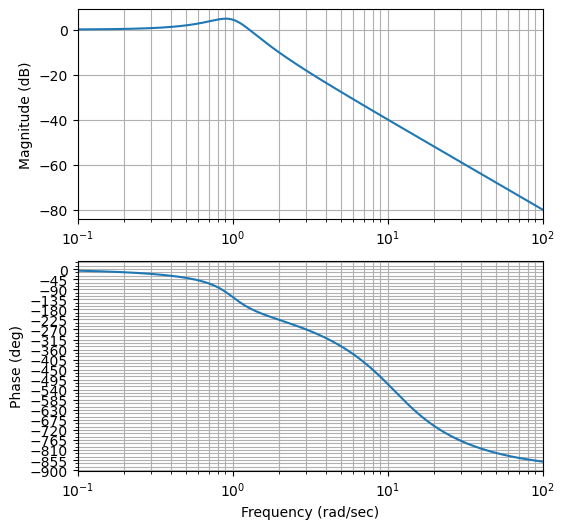

In [3]:
print("制御対象を準備")

# Pを作る
# 伝達関数の分子と分母
num_P = [1]
den_P = [1, 0.6, 1]

# パデ近似を計算する
[num_approx, den_approx] = matlab.pade(0.6, 4)

# パデ近似の分子と分母を表示する
print('Approximation numerator:')
print(num_approx)
print('Approximation denominator:')
print(den_approx)

# 伝達関数の分子と分母にパデ近似を適用する
num_total = np.convolve(num_P, num_approx)
den_total = np.convolve(den_P, den_approx)

# 伝達関数を作成する
P = matlab.tf(num_total, den_total)
print('Approximated Transfer Function:')
print("P=", P)

print("極を確認")
print(matlab.pole(P))  # 極を確認

print("以下に制御対象のボード線図を示す")
fig = plt.figure(figsize=(6, 6))  # 6×6のfigureを作成
mag, phase, omega = matlab.bode(P, Hz=False)  # ボード線図を描画
plt.xlim(1e-01, 1e+02)  # x軸の範囲を1e-01から1e+02に設定
plt.show()

### 制御器を準備

In [4]:
print("制御器を準備")

# K_1を作る
num_K_1 = [1, 0.3]
den_K_1 = [1, 0]
K_1 = matlab.tf(num_K_1, den_K_1)

# K_2を作る
num_K_2_a = [3.21e+05]
den_K_2_a = [1, 0]
K_2_a = matlab.tf(num_K_2_a, den_K_2_a)
num_K_2_b = [1, 3]
den_K_2_b = [1, 127]
K_2_b = matlab.tf(num_K_2_b, den_K_2_b)
num_K_2_c = [1, 1.667]
den_K_2_c = [1, 1.92]
K_2_c = matlab.tf(num_K_2_c, den_K_2_c)
num_K_2_d = [1, 0.6, 1]
den_K_2_d = [1, 104, 4450]
K_2_d = matlab.tf(num_K_2_d, den_K_2_d)

K_2 = matlab.series(K_2_a, K_2_b, K_2_c, K_2_d) #直列にする

print("以下にPI補償器の伝達関数を出力する")
print("K_1=", K_1) #PIの補償器の伝達関数を出力
print("K_2=", K_2) #PIの補償器の伝達関数を出力

制御器を準備
以下にPI補償器の伝達関数を出力する
K_1= 
s + 0.3
-------
   s

K_2= 
3.21e+05 s^4 + 1.691e+06 s^3 + 2.825e+06 s^2 + 2.461e+06 s + 1.605e+06
----------------------------------------------------------------------
     s^5 + 232.9 s^4 + 1.81e+04 s^3 + 5.991e+05 s^2 + 1.085e+06 s



### フィードバック制御系を構成し，ステップ応答を求める

(P_0,K_1)
ステップ応答を計算
(P_0,K_2)
ステップ応答を計算
(P,K_1)
ステップ応答を計算
(P,K_2)
ステップ応答を計算
以下にステップ応答を計算した結果を示す


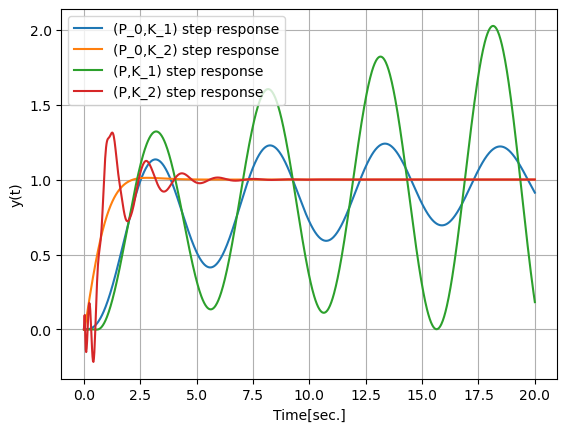

In [5]:
print("(P_0,K_1)")
sys_1= matlab.feedback(P_0*K_1,1,-1) #フィードバック系を構成

print("ステップ応答を計算")
time= 20 #時間間隔は20
t = np.linspace(0,time,1000) #0～1000まで20間隔で羅列されたベクトルを作成
#制御対象に対して与えられた時間ベクトル t に基づいてステップ応答を計算し，その結果を y1 と T1 に格納することを意味する．
#具体的には，t ベクトルで指定された時間の各時点におけるステップ入力に対する制御対象の応答を計算し，その応答の時間変化を表す信号を y1 に，対応する時間ベクトルを T1 に格納する．
y1,T1 = matlab.step(sys_1,t)

#------------------------------------------------------------
print("(P_0,K_2)")
sys_2= matlab.feedback(P_0*K_2,1,-1) #フィードバック系を構成

print("ステップ応答を計算")
time= 20 #時間間隔は20
t = np.linspace(0,time,1000) #0～1000まで20間隔で羅列されたベクトルを作成
#制御対象に対して与えられた時間ベクトル t に基づいてステップ応答を計算し，その結果を y2 と T2 に格納することを意味する．
#具体的には，t ベクトルで指定された時間の各時点におけるステップ入力に対する制御対象の応答を計算し，その応答の時間変化を表す信号を y1 に，対応する時間ベクトルを T1 に格納する．
y2,T2 = matlab.step(sys_2,t)

#------------------------------------------------------------
print("(P,K_1)")
sys_3= matlab.feedback(P*K_1,1,-1) #フィードバック系を構成

print("ステップ応答を計算")
time= 20 #時間間隔は20
t = np.linspace(0,time,1000) #0～1000まで20間隔で羅列されたベクトルを作成
#制御対象に対して与えられた時間ベクトル t に基づいてステップ応答を計算し，その結果を y3 と T3 に格納することを意味する．
#具体的には，t ベクトルで指定された時間の各時点におけるステップ入力に対する制御対象の応答を計算し，その応答の時間変化を表す信号を y1 に，対応する時間ベクトルを T1 に格納する．
y3,T3 = matlab.step(sys_3,t)

#------------------------------------------------------------
print("(P,K_2)")
sys_4= matlab.feedback(P*K_2,1,-1) #フィードバック系を構成

print("ステップ応答を計算")
time= 20 #時間間隔は20
t = np.linspace(0,time,1000) #0～1000まで20間隔で羅列されたベクトルを作成
#制御対象に対して与えられた時間ベクトル t に基づいてステップ応答を計算し，その結果を y4 と T4 に格納することを意味する．
#具体的には，t ベクトルで指定された時間の各時点におけるステップ入力に対する制御対象の応答を計算し，その応答の時間変化を表す信号を y1 に，対応する時間ベクトルを T1 に格納する．
y4,T4 = matlab.step(sys_4,t)

#------------------------------------------------------------

print("以下にステップ応答を計算した結果を示す")
#ステップ応答の時間変化を示すグラフを作成し，その際に横軸に時間，縦軸に応答の値を配置する．T1は時間ベクトルであり，y1は対応する応答の値を表す．
#具体的には，T1に沿って時間が進行するときの，y1の値をグラフ上にプロットします．
plt.plot(T1, y1, label = "(P_0,K_1) step response")
plt.plot(T2, y2, label = "(P_0,K_2) step response")
plt.plot(T3, y3, label = "(P,K_1) step response")
plt.plot(T4, y4, label = "(P,K_2) step response")
plt.xlabel("Time[sec.]")
plt.ylabel("y(t)")
plt.grid()
plt.legend()

### S(s)のボード線図を求める

以下にS(s)のボード線図を示す


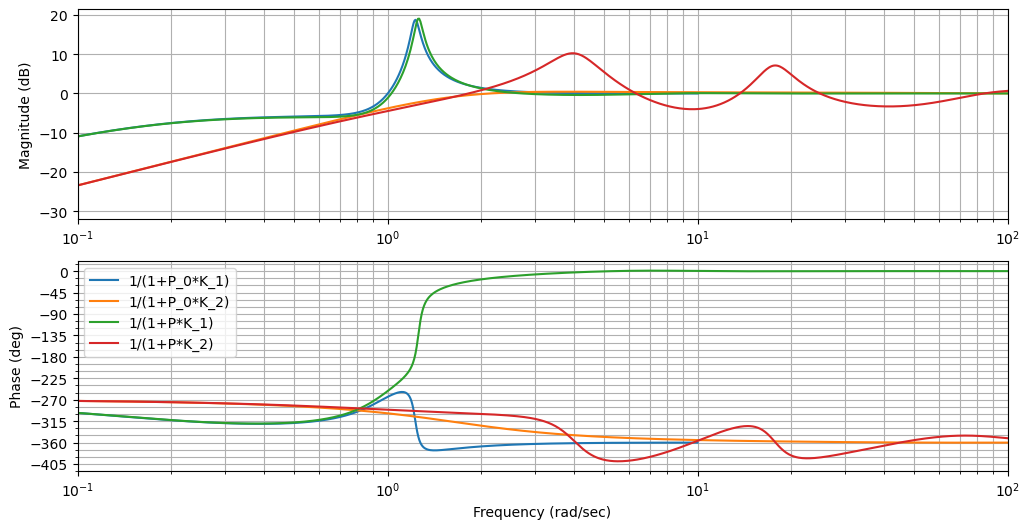

In [10]:
sys_5= matlab.feedback(1,P_0*K_1,-1) #フィードバック系を構成
sys_6= matlab.feedback(1,P_0*K_2,-1) #フィードバック系を構成
sys_7= matlab.feedback(1,P*K_1,-1) #フィードバック系を構成
sys_8= matlab.feedback(1,P*K_2,-1) #フィードバック系を構成

fig = plt.figure(figsize = (12, 6)) #12×6のfigureを作成

print("以下にS(s)のボード線図を示す")
mag5, phase5, omega5 = matlab.bode(sys_5, Hz=False, label='1/(1+P_0*K_1)') #figureにボード線図を描画
mag6, phase6, omega6 = matlab.bode(sys_6, Hz=False, label='1/(1+P_0*K_2)') #figureにボード線図を描画
mag7, phase7, omega7 = matlab.bode(sys_7, Hz=False, label='1/(1+P*K_1)') #figureにボード線図を描画
mag8, phase8, omega8 = matlab.bode(sys_8, Hz=False, label='1/(1+P*K_2)') #figureにボード線図を描画
plt.xlim(1e-01, 1e+02) # x軸の範囲を1e-01から1e+02に設定

# プロットの設定
plt.xlim(1e-01, 1e+02)  # x軸の範囲を1e-01から1e+02に設定
plt.legend()  # 凡例を表示
plt.grid(True)  # グリッドを表示
plt.show()  # プロットを表示

### T(s)のボード線図を求める

以下にT(s)のボード線図を示す


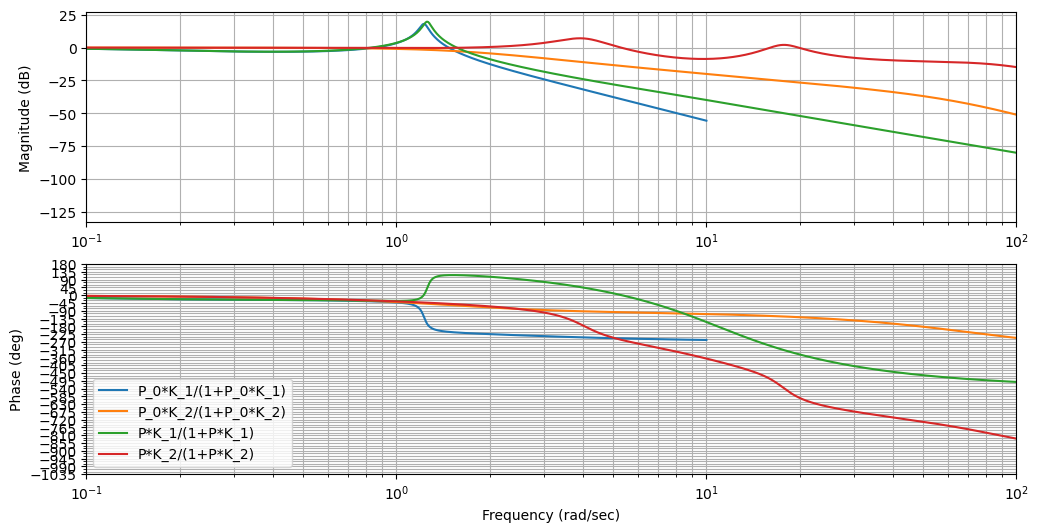

In [9]:
# sys1～4を使う

fig = plt.figure(figsize = (12, 6)) #12×6のfigureを作成

print("以下にT(s)のボード線図を示す")
mag1, phase1, omega1 = matlab.bode(sys_1, Hz=False, label='P_0*K_1/(1+P_0*K_1)') #figureにボード線図を描画
mag2, phase2, omega2 = matlab.bode(sys_2, Hz=False, label='P_0*K_2/(1+P_0*K_2)') #figureにボード線図を描画
mag3, phase3, omega3 = matlab.bode(sys_3, Hz=False, label='P*K_1/(1+P*K_1)') #figureにボード線図を描画
mag4, phase4, omega4 = matlab.bode(sys_4, Hz=False, label='P*K_2/(1+P*K_2)') #figureにボード線図を描画
plt.xlim(1e-01, 1e+02) # x軸の範囲を1e-01から1e+02に設定

# プロットの設定
plt.xlim(1e-01, 1e+02)  # x軸の範囲を1e-01から1e+02に設定
plt.legend()  # 凡例を表示
plt.grid(True)  # グリッドを表示
plt.show()  # プロットを表示